# Mapping swimming pools with text prompts

[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeos/segment-geospatial/blob/main/docs/examples/swimming_pools.ipynb)
[![image](https://img.shields.io/badge/Open-Planetary%20Computer-black?style=flat&logo=microsoft)](https://pccompute.westeurope.cloudapp.azure.com/compute/hub/user-redirect/git-pull?repo=https://github.com/opengeos/segment-geospatial&urlpath=lab/tree/segment-geospatial/docs/examples/swimming_pools.ipynb&branch=main)
[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeos/segment-geospatial/blob/main/docs/examples/swimming_pools.ipynb)

This notebook shows how to map swimming pools with text prompts and the Segment Anything Model (SAM). 

Make sure you use GPU runtime for this notebook. For Google Colab, go to `Runtime` -> `Change runtime type` and select `GPU` as the hardware accelerator. 

## Install dependencies

Uncomment and run the following cell to install the required dependencies.

In [ ]:
# %pip install segment-geospatial groundingdino-py leafmap localtileserver

In [1]:
import leafmap
from samgeo import tms_to_geotiff
from samgeo.text_sam import LangSAM

## Create an interactive map

In [2]:
m = leafmap.Map(center=[18.8829, -98.9867], zoom=19, height="600px")
m.add_basemap("SATELLITE")
m

Map(center=[18.8829, -98.9867], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

## Download a sample image

Pan and zoom the map to select the area of interest. Use the draw tools to draw a polygon or rectangle on the map

In [3]:
bbox = m.user_roi_bounds()
if bbox is None:
    bbox = [-98.9877, 18.8816, -98.9843, 18.8838]

In [4]:
m.user_roi_bounds ()

[-98.9877, 18.8816, -98.9843, 18.8838]

In [8]:
image = "Image.tif"
tms_to_geotiff(output=image, bbox=bbox, zoom=22, source="Satellite", overwrite=True)

Downloaded image 0001/1148
Downloaded image 0002/1148
Downloaded image 0003/1148
Downloaded image 0004/1148
Downloaded image 0005/1148
Downloaded image 0006/1148
Downloaded image 0007/1148
Downloaded image 0008/1148
Downloaded image 0009/1148
Downloaded image 0010/1148
Downloaded image 0011/1148
Downloaded image 0012/1148
Downloaded image 0013/1148
Downloaded image 0014/1148
Downloaded image 0015/1148
Downloaded image 0016/1148
Downloaded image 0017/1148
Downloaded image 0018/1148
Downloaded image 0019/1148
Downloaded image 0020/1148
Downloaded image 0021/1148
Downloaded image 0022/1148
Downloaded image 0023/1148
Downloaded image 0024/1148
Downloaded image 0025/1148
Downloaded image 0026/1148
Downloaded image 0027/1148
Downloaded image 0028/1148
Downloaded image 0029/1148
Downloaded image 0030/1148
Downloaded image 0031/1148
Downloaded image 0032/1148
Downloaded image 0033/1148
Downloaded image 0034/1148
Downloaded image 0035/1148
Downloaded image 0036/1148
Downloaded image 0037/1148
D

Downloaded image 0311/1148
Downloaded image 0312/1148
Downloaded image 0313/1148
Downloaded image 0314/1148
Downloaded image 0315/1148
Downloaded image 0316/1148
Downloaded image 0317/1148
Downloaded image 0318/1148
Downloaded image 0319/1148
Downloaded image 0320/1148
Downloaded image 0321/1148
Downloaded image 0322/1148
Downloaded image 0323/1148
Downloaded image 0324/1148
Downloaded image 0325/1148
Downloaded image 0326/1148
Downloaded image 0327/1148
Downloaded image 0328/1148
Downloaded image 0329/1148
Downloaded image 0330/1148
Downloaded image 0331/1148
Downloaded image 0332/1148
Downloaded image 0333/1148
Downloaded image 0334/1148
Downloaded image 0335/1148
Downloaded image 0336/1148
Downloaded image 0337/1148
Downloaded image 0338/1148
Downloaded image 0339/1148
Downloaded image 0340/1148
Downloaded image 0341/1148
Downloaded image 0342/1148
Downloaded image 0343/1148
Downloaded image 0344/1148
Downloaded image 0345/1148
Downloaded image 0346/1148
Downloaded image 0347/1148
D

Downloaded image 0618/1148
Downloaded image 0619/1148
Downloaded image 0620/1148
Downloaded image 0621/1148
Downloaded image 0622/1148
Downloaded image 0623/1148
Downloaded image 0624/1148
Downloaded image 0625/1148
Downloaded image 0626/1148
Downloaded image 0627/1148
Downloaded image 0628/1148
Downloaded image 0629/1148
Downloaded image 0630/1148
Downloaded image 0631/1148
Downloaded image 0632/1148
Downloaded image 0633/1148
Downloaded image 0634/1148
Downloaded image 0635/1148
Downloaded image 0636/1148
Downloaded image 0637/1148
Downloaded image 0638/1148
Downloaded image 0639/1148
Downloaded image 0640/1148
Downloaded image 0641/1148
Downloaded image 0642/1148
Downloaded image 0643/1148
Downloaded image 0644/1148
Downloaded image 0645/1148
Downloaded image 0646/1148
Downloaded image 0647/1148
Downloaded image 0648/1148
Downloaded image 0649/1148
Downloaded image 0650/1148
Downloaded image 0651/1148
Downloaded image 0652/1148
Downloaded image 0653/1148
Downloaded image 0654/1148
D

Downloaded image 0927/1148
Downloaded image 0928/1148
Downloaded image 0929/1148
Downloaded image 0930/1148
Downloaded image 0931/1148
Downloaded image 0932/1148
Downloaded image 0933/1148
Downloaded image 0934/1148
Downloaded image 0935/1148
Downloaded image 0936/1148
Downloaded image 0937/1148
Downloaded image 0938/1148
Downloaded image 0939/1148
Downloaded image 0940/1148
Downloaded image 0941/1148
Downloaded image 0942/1148
Downloaded image 0943/1148
Downloaded image 0944/1148
Downloaded image 0945/1148
Downloaded image 0946/1148
Downloaded image 0947/1148
Downloaded image 0948/1148
Downloaded image 0949/1148
Downloaded image 0950/1148
Downloaded image 0951/1148
Downloaded image 0952/1148
Downloaded image 0953/1148
Downloaded image 0954/1148
Downloaded image 0955/1148
Downloaded image 0956/1148
Downloaded image 0957/1148
Downloaded image 0958/1148
Downloaded image 0959/1148
Downloaded image 0960/1148
Downloaded image 0961/1148
Downloaded image 0962/1148
Downloaded image 0963/1148
D

You can also use your own image. Uncomment and run the following cell to use your own image.

In [ ]:
# image = 'alberca.tif'

Display the downloaded image on the map.

In [9]:
m.layers[-1].visible = False
m.add_raster(image, layer_name="Image")
m

Map(bottom=29969308.999998577, center=[18.882325674303093, -98.98620781219947], controls=(ZoomControl(options=…

## Initialize LangSAM class

The initialization of the LangSAM class might take a few minutes. The initialization downloads the model weights and sets up the model for inference.

In [10]:
sam = LangSAM()

final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## Specify text prompts

In [11]:
text_prompt = "swimming pool"

## Segment the image

Part of the model prediction includes setting appropriate thresholds for object detection and text association with the detected objects. These threshold values range from 0 to 1 and are set while calling the predict method of the LangSAM class.

`box_threshold`: This value is used for object detection in the image. A higher value makes the model more selective, identifying only the most confident object instances, leading to fewer overall detections. A lower value, conversely, makes the model more tolerant, leading to increased detections, including potentially less confident ones.

`text_threshold`: This value is used to associate the detected objects with the provided text prompt. A higher value requires a stronger association between the object and the text prompt, leading to more precise but potentially fewer associations. A lower value allows for looser associations, which could increase the number of associations but also introduce less precise matches.

Remember to test different threshold values on your specific data. The optimal threshold can vary depending on the quality and nature of your images, as well as the specificity of your text prompts. Make sure to choose a balance that suits your requirements, whether that's precision or recall.

In [14]:
sam.predict(image, text_prompt, box_threshold=0.22, text_threshold=0.22)

## Visualize the results

Show the result with bounding boxes on the map.

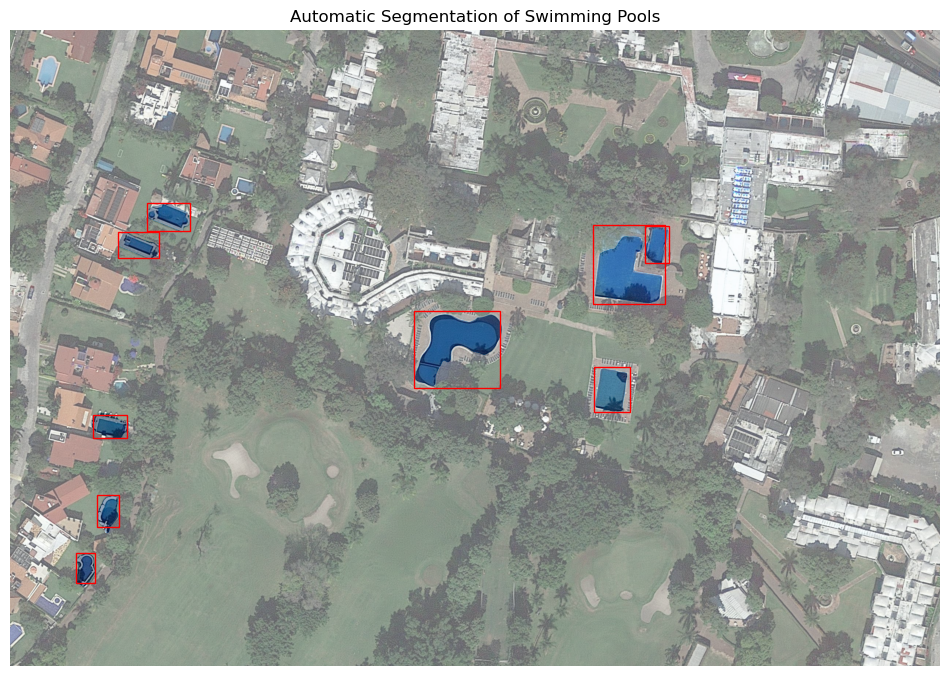

In [15]:
sam.show_anns(
    cmap='Blues',
    box_color='red',
    title='Automatic Segmentation of Swimming Pools',
    blend=True,
)

![](https://i.imgur.com/aXbxCFt.png)

Show the result without bounding boxes on the map.

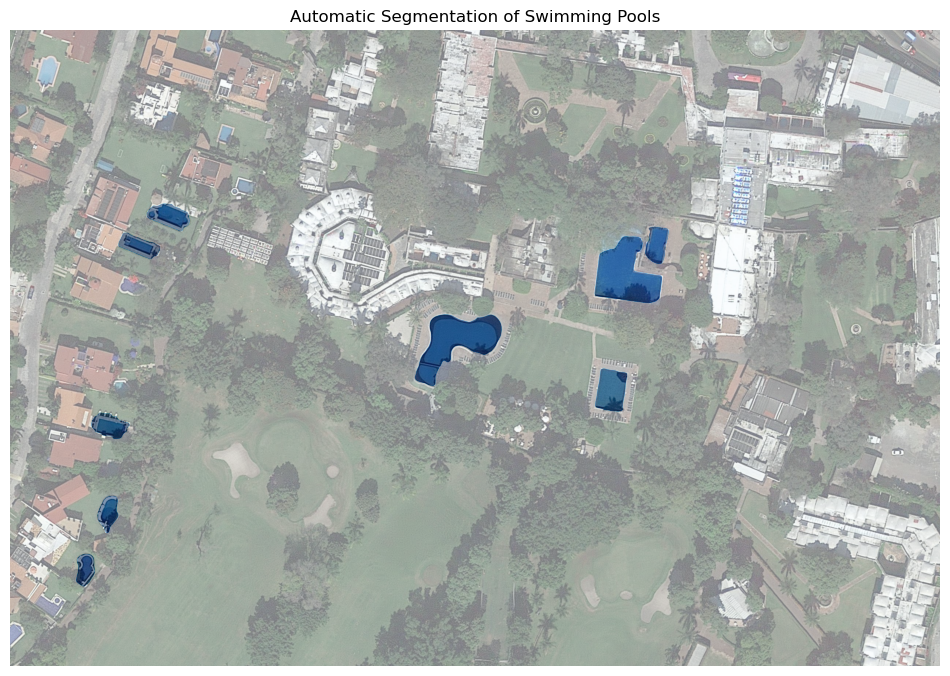

In [17]:
sam.show_anns(
    cmap='Blues',
    add_boxes=False,
    alpha=0.5,
    title='Automatic Segmentation of Swimming Pools',
)

![](https://i.imgur.com/9wOkCHC.png)

Show the result as a grayscale image.

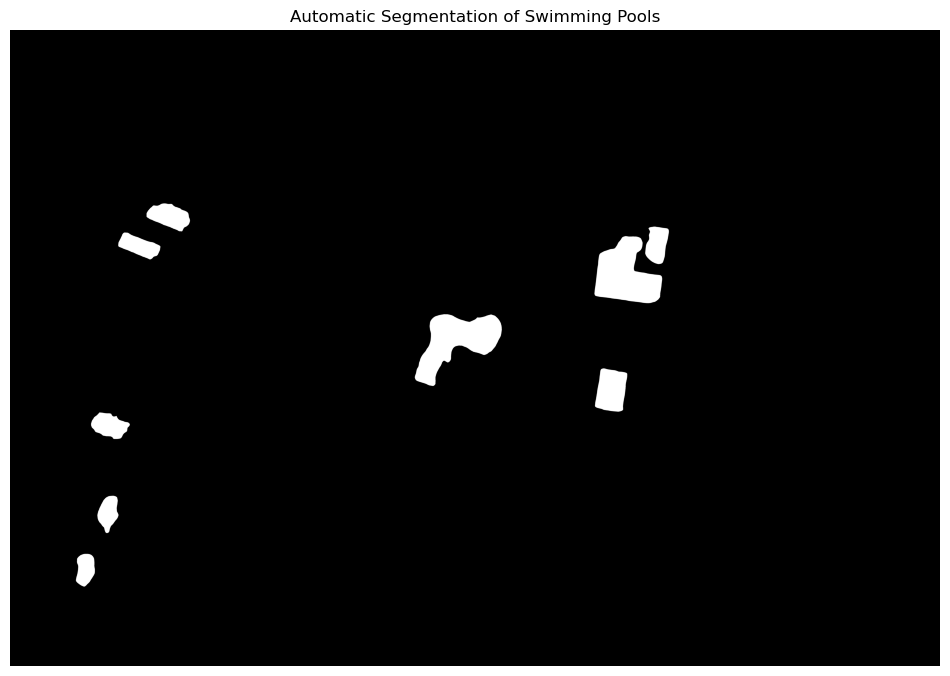

In [18]:
sam.show_anns(
    cmap='Greys_r',
    add_boxes=False,
    alpha=1,
    title='Automatic Segmentation of Swimming Pools',
    blend=False,
    output='pools.tif',
)

![](https://i.imgur.com/lbNtUou.png)

Convert the result to a vector format.  

In [19]:
sam.raster_to_vector("pools.tif", "pools.shp")

Show the results on the interactive map.

In [20]:
m.add_raster("pools.tif", layer_name="Pools", palette="Blues", opacity=0.5, nodata=0)
style = {
    "color": "#3388ff",
    "weight": 2,
    "fillColor": "#7c4185",
    "fillOpacity": 0.5,
}
m.add_vector("pools.shp", layer_name="Vector", style=style)
m

Map(bottom=29969235.0, center=[18.8827, -98.98599999999999], controls=(ZoomControl(options=['position', 'zoom_…

![](https://i.imgur.com/HmFYDAf.png)

## Interactive segmentation

In [21]:
sam.show_map()

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

![](https://i.imgur.com/4Q2qpMA.gif)